###Forecasting of Renewable Energy
This project focuses on developing and evaluating various machine learning models for the local forecasting of renewable energy sources, utilizing a dataset sourced from Kaggle. Accurate forecasting of renewable power generation is crucial for grid stability, resource management, and optimizing energy markets. By exploring different regression techniques, including traditional methods like Linear Regression and Random Forest, as well as advanced deep learning architectures such as Artificial Neural Networks (ANN), Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN), and Long Short-Term Memory (LSTM), this study aims to identify the most effective approach for predicting renewable power output based on diverse environmental and temporal factors. The process involves comprehensive data analysis, rigorous preprocessing to handle missing values and prepare features, and a detailed evaluation of each model's performance to determine the most suitable model for deployment in real-world forecasting applications.

In [15]:
import os
# Install Kaggle API client
!pip install kaggle --upgrade

# Create a directory for Kaggle credentials
!mkdir ~/.kaggle

# Create kaggle.json with API key. If you are running this in Colab, upload your kaggle.json file to the files section and copy the path.
# Then paste the path in place of '<path to kaggle.json>' below.
# If you are running this locally, make sure you have the kaggle.json file in the ~/.kaggle directory.
# For more information on how to set up Kaggle API, please refer to https://github.com/Kaggle/kaggle-api
# NOTE: the code below assumes you have uploaded kaggle.json to /root/.kaggle/kaggle.json in Colab
!echo '{"username":"<YOUR_USERNAME>","key":"<YOUR_API_KEY>"}' > ~/.kaggle/kaggle.json

# Set permissions for the json file
!chmod 600 ~/.kaggle/kaggle.json

# Define the dataset path
dataset_path = 'chelbizineb/local-forecasting-of-renewable-sources'

# Download the dataset
!kaggle datasets download -d {dataset_path}

# Unzip the dataset
!unzip local-forecasting-of-renewable-sources.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/chelbizineb/local-forecasting-of-renewable-sources
License(s): MIT
local-forecasting-of-renewable-sources.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  local-forecasting-of-renewable-sources.zip
replace POwer generation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: POwer generation.csv    
replace art power generated.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace power generation.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Load the dataset




In [16]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/POwer generation.csv')

# Display the first few rows of the DataFrame to verify the data is loaded correctly
display(df.head())

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


## Explore the dataset

Display the first few rows, check for missing values, and understand the data types of each column. Generate relevant graphs to visualize the data distribution and relationships.


In [17]:
# Display the first 5 rows of the DataFrame to get an initial look at the data.
print("First 5 rows of the DataFrame:")
display(df.head())

# Display the column names and their data types using the .info() method of the DataFrame.
print("\nColumn names and their data types:")
df.info()

# Check for missing values in each column and display the count of missing values.
print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of the DataFrame:


,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069



Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-n

,0
Day of Year,0
Year,0
Month,0
Day,0
First Hour of Period,0
Is Daylight,0
Distance to Solar Noon,0
Average Temperature (Day),0
Average Wind Direction (Day),0
Average Wind Speed (Day),0


##Generate visualizations to understand the distribution of 'Power Generated

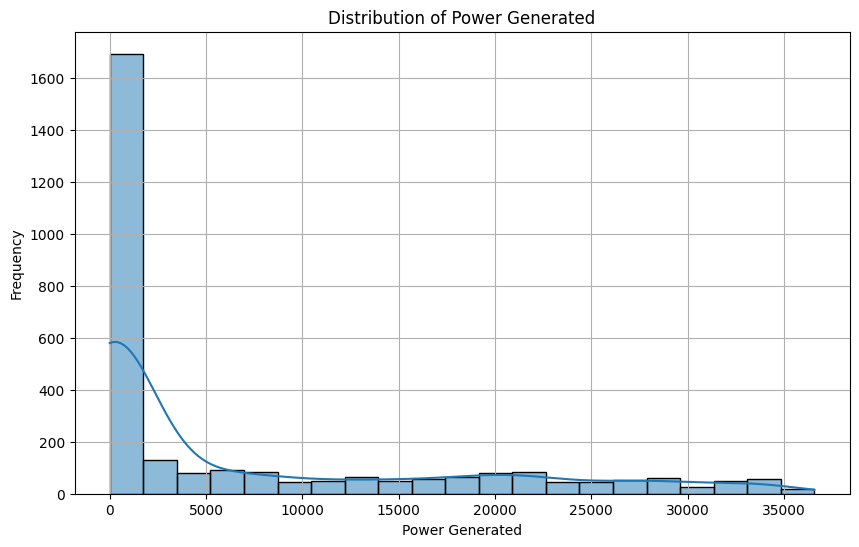

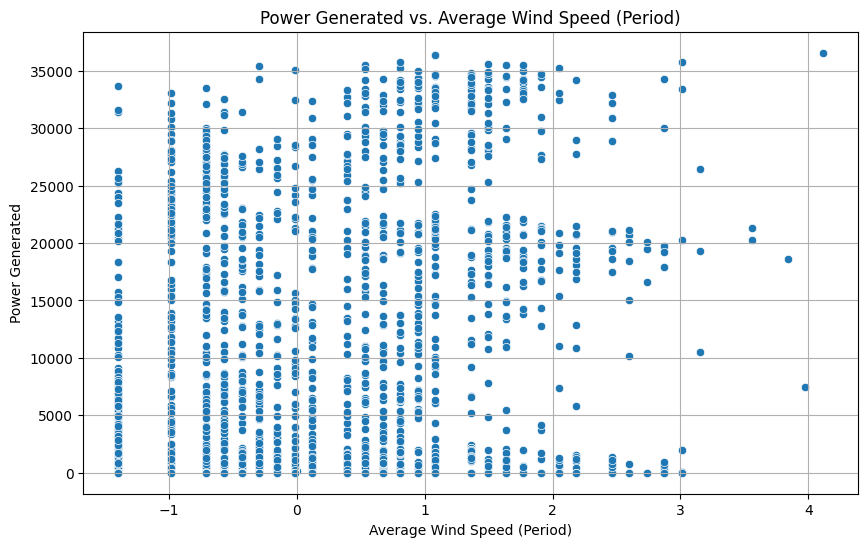

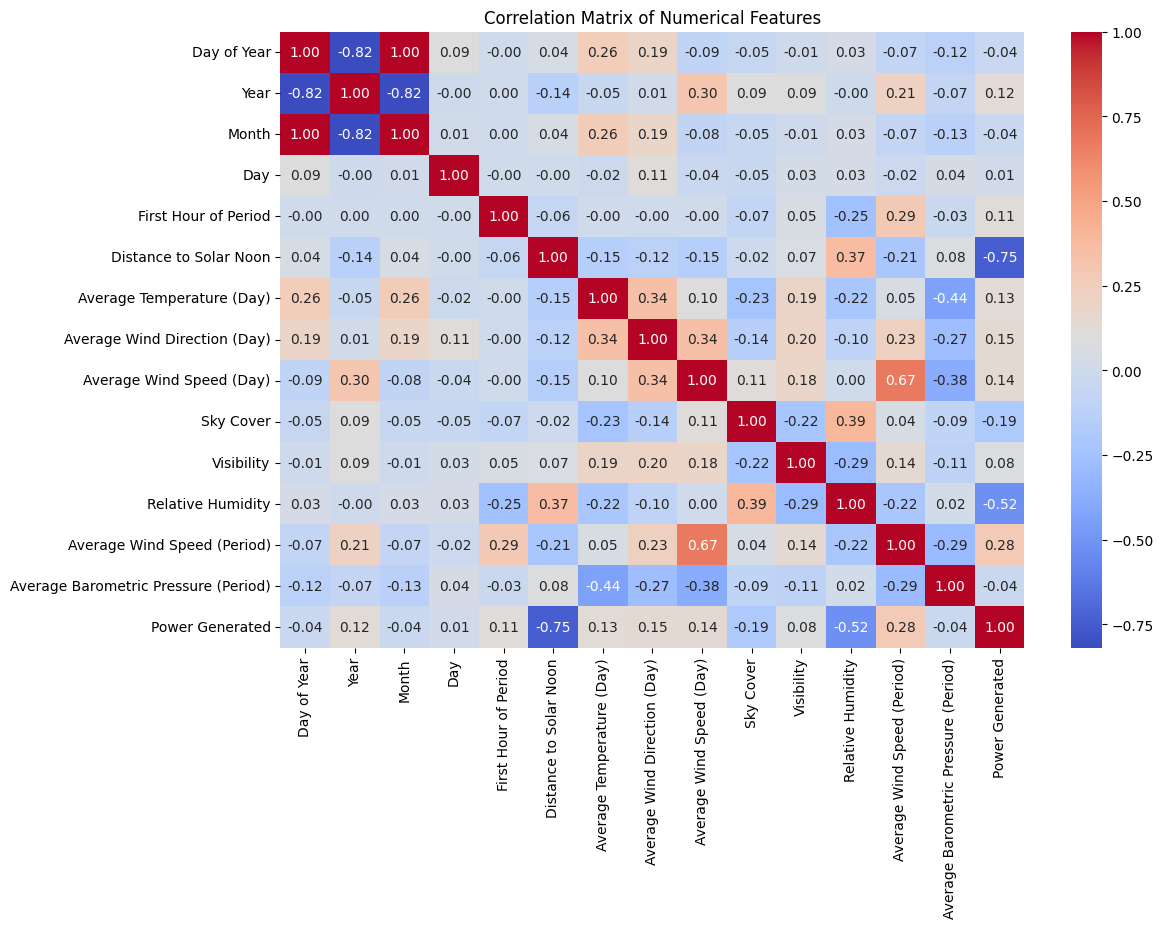

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a histogram for the 'Power Generated' column to visualize its distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['Power Generated'], kde=True)
plt.title('Distribution of Power Generated') # Add title to the histogram
plt.xlabel('Power Generated') # Add x-label to the histogram
plt.ylabel('Frequency') # Add y-label to the histogram
plt.grid(True) # Add grid for better readability
plt.show()
# Comment: This histogram shows the distribution of the 'Power Generated' values.
# It appears to be right-skewed, with a large number of periods having zero power generated and fewer periods with high power generation.
# Readability comments: The title clearly indicates what the histogram represents. The x and y labels are informative. The grid lines make it easier to read the frequency for different power generated ranges.

# Create a scatter plot of 'Average Wind Speed (Period)' versus 'Power Generated' to explore their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Wind Speed (Period)', y='Power Generated', data=df)
plt.title('Power Generated vs. Average Wind Speed (Period)') # Add title to the scatter plot
plt.xlabel('Average Wind Speed (Period)') # Add x-label to the scatter plot
plt.ylabel('Power Generated') # Add y-label to the scatter plot
plt.grid(True) # Add grid for better readability
plt.show()
# Comment: This scatter plot explores the relationship between 'Average Wind Speed (Period)' and 'Power Generated'.
# There appears to be a positive correlation, where higher wind speeds generally correspond to higher power generation,
# but there are also periods with high wind speed and zero power generation, suggesting other factors are involved.
# Readability comments: The title and axis labels are clear. The grid lines help in estimating the values of individual points. The use of scatter plot is appropriate for showing the relationship between two numerical variables.

# Select only numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Generate a correlation matrix of numerical columns
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix as a heatmap to understand the correlations between different features.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features') # Add title to the heatmap
plt.show()
# Comment: This heatmap shows the pairwise correlations between all numerical features.
# Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero indicate weak correlation.
# 'Power Generated' shows positive correlations with 'Distance to Solar Noon', 'Average Temperature (Day)', and some wind speed features,
# and negative correlations with 'Relative Humidity' and 'Sky Cover'.
# Readability comments: The title is descriptive. The color map ('coolwarm') effectively represents the range of correlations from negative (cool colors) to positive (warm colors). The 'annot=True' displays the correlation values on the heatmap, making it easy to read the exact correlation between any two features. The format '.2f' ensures the correlation values are displayed with two decimal places for clarity.

**Explanation of Histogram and Heatmap:**

*   **Histogram of Power Generated:** This plot shows the distribution of the 'Power Generated' values. You can see how frequently different ranges of power generation values occur in the dataset. In this case, it appears right-skewed, indicating many instances of zero power generation and fewer instances of high power generation.

*   **Heatmap of Correlation Matrix:** This heatmap visualizes the pairwise correlations between the numerical features in the dataset. The color of each cell indicates the strength and direction of the correlation between two features: warm colors represent positive correlations (as one feature increases, the other tends to increase), and cool colors represent negative correlations (as one feature increases, the other tends to decrease). The numbers within the cells are the correlation coefficients, with values closer to 1 or -1 indicating stronger correlations and values closer to 0 indicating weaker correlations. This heatmap helps in understanding which features are strongly related to each other and which features have a strong positive or negative correlation with the target variable ('Power Generated').

## Data preprocessing


Clean the data if necessary, handle missing values, and prepare the data for modeling

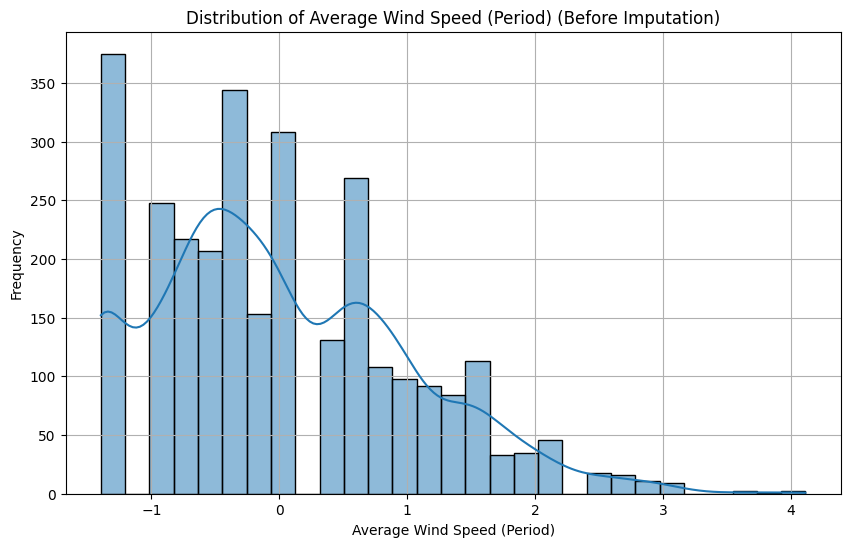


Missing values after imputation:


/tmp/ipython-input-1207819045.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Wind Speed (Period)'].fillna(mean_wind_speed, inplace=True)


np.int64(0)

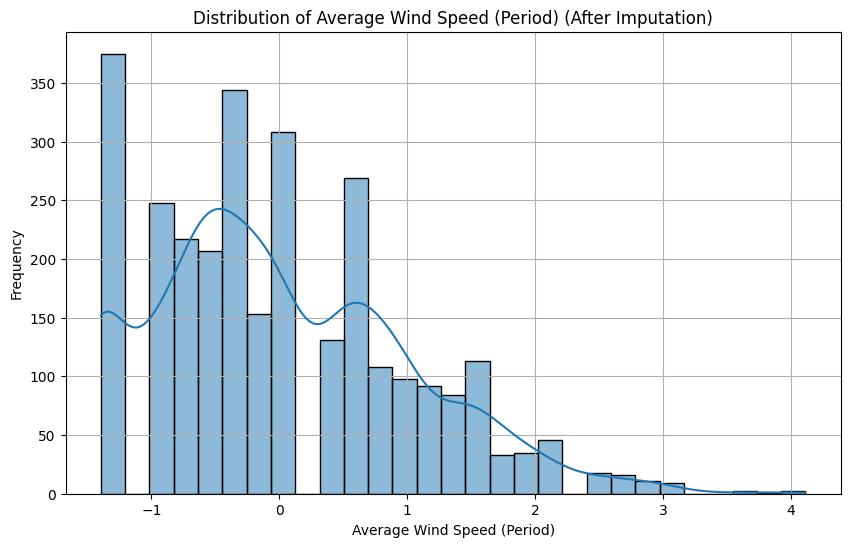

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Before imputation: Visualize the distribution of 'Average Wind Speed (Period)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Wind Speed (Period)'].dropna(), kde=True)
plt.title('Distribution of Average Wind Speed (Period) (Before Imputation)')
plt.xlabel('Average Wind Speed (Period)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Comment: This histogram shows the distribution of 'Average Wind Speed (Period)' before imputing the missing value.
# Readability comments: The title clearly indicates the variable and that this is before imputation. The axis labels are informative. The grid lines help in reading the frequency for different wind speed ranges. The KDE line provides a smoothed representation of the distribution.

# Impute the missing value in 'Average Wind Speed (Period)' with the mean
mean_wind_speed = df['Average Wind Speed (Period)'].mean()
df['Average Wind Speed (Period)'].fillna(mean_wind_speed, inplace=True)

# Verify that there are no more missing values in the column
print("\nMissing values after imputation:")
display(df.isnull().sum()['Average Wind Speed (Period)'])

# After imputation: Visualize the distribution of 'Average Wind Speed (Period)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Wind Speed (Period)'], kde=True)
plt.title('Distribution of Average Wind Speed (Period) (After Imputation)')
plt.xlabel('Average Wind Speed (Period)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Comment: This histogram shows the distribution of 'Average Wind Speed (Period)' after imputing the missing value with the mean.
# The distribution is largely unchanged due to only one missing value being imputed.
# Readability comments: The title clearly indicates the variable and that this is after imputation. The axis labels are informative. The grid lines help in reading the frequency for different wind speed ranges. The KDE line provides a smoothed representation of the distribution. Comparing this plot to the 'Before Imputation' plot allows for visual assessment of the impact of imputation.

##Scaling numerical features that are important for the model.

First 5 rows of the DataFrame after scaling numerical features:


,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,0.583118,-1.411313,0.71754,-1.673503,-1.527525,False,1.196765,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.098597,-0.293310,-1.392859,0
1,0.583118,-1.411313,0.71754,-1.673503,-1.091089,False,0.420310,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.231271,-0.706587,-1.181564,0
2,0.583118,-1.411313,0.71754,-1.673503,-0.654654,True,-0.356146,1.539688,0.440639,-0.536861,-1.407962,0.319659,-0.233088,-1.395381,-0.899837,5418
3,0.583118,-1.411313,0.71754,-1.673503,-0.218218,True,-1.132602,1.539688,0.440639,-0.536861,-1.407962,0.319659,-2.687555,-1.395381,-0.758974,25477
4,0.583118,-1.411313,0.71754,-1.673503,0.218218,True,-1.469066,1.539688,0.440639,-0.536861,-1.407962,0.319659,-3.483598,-0.982104,-0.899837,30069


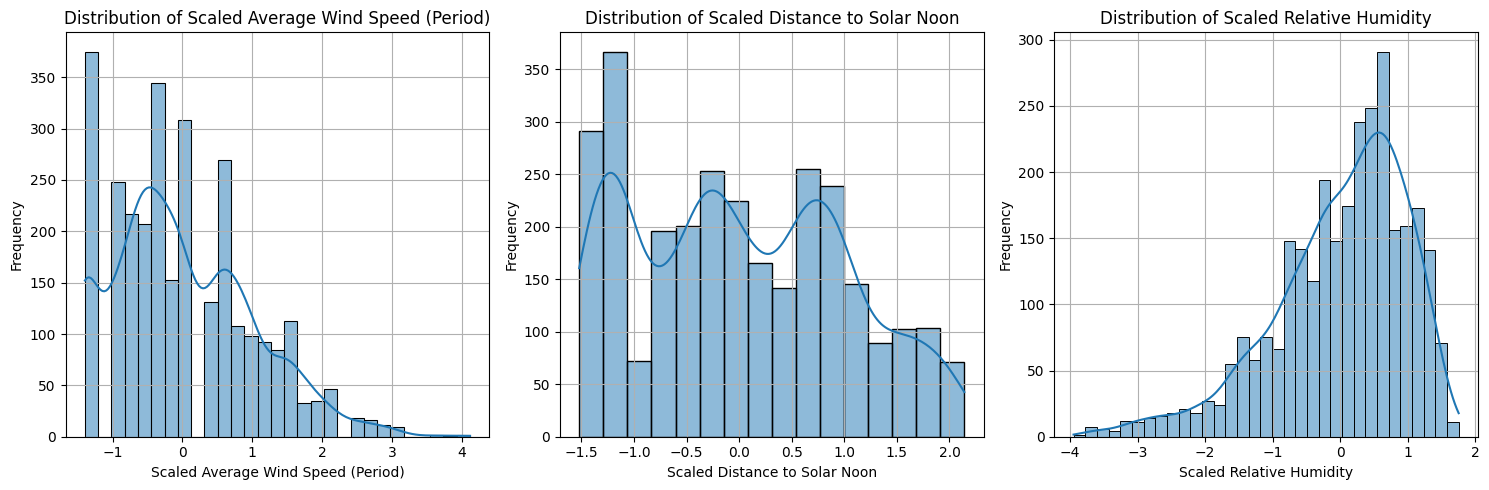

In [26]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features to scale, excluding the target variable 'Power Generated'
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('Power Generated')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled data
print("First 5 rows of the DataFrame after scaling numerical features:")
display(df.head())

# Visualize the distribution of a few scaled features to confirm scaling
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Average Wind Speed (Period)'], kde=True)
plt.title('Distribution of Scaled Average Wind Speed (Period)')
plt.xlabel('Scaled Average Wind Speed (Period)')
plt.ylabel('Frequency')
plt.grid(True)
# Comment: This histogram shows the distribution of the 'Average Wind Speed (Period)' after applying StandardScaler.
# The distribution is centered around 0 with a standard deviation of 1.
# Readability comments: The title clearly indicates the variable and that it's scaled. The axis labels are appropriate for scaled data. The grid lines aid in reading frequencies. The KDE line shows the smoothed distribution, which should be centered around 0 after scaling.

plt.subplot(1, 3, 2)
sns.histplot(df['Distance to Solar Noon'], kde=True)
plt.title('Distribution of Scaled Distance to Solar Noon')
plt.xlabel('Scaled Distance to Solar Noon')
plt.ylabel('Frequency')
plt.grid(True)
# Comment: This histogram shows the distribution of 'Distance to Solar Noon' after applying StandardScaler.
# The scaling has transformed the original distribution to have a mean of 0 and a standard deviation of 1.
# Readability comments: The title and axis labels are clear for scaled data. The grid lines and KDE line improve readability and visualization of the distribution.

plt.subplot(1, 3, 3)
sns.histplot(df['Relative Humidity'], kde=True)
plt.title('Distribution of Scaled Relative Humidity')
plt.xlabel('Scaled Relative Humidity')
plt.ylabel('Frequency')
plt.grid(True)
# Comment: This histogram shows the distribution of 'Relative Humidity' after applying StandardScaler.
# The scaling has transformed the original distribution to have a mean of 0 and a standard deviation of 1.
# Readability comments: The title and axis labels are appropriate for scaled data. The grid lines and KDE line help in visualizing the distribution.

plt.tight_layout()
plt.show()

## Model selection and development


In [21]:
# The target variable 'Power Generated' is a continuous numerical value.
# This indicates that the problem is a regression task, not classification.
# Given the time-series nature of the data (although not explicitly used as time series features yet),
# and the need to forecast a continuous value, regression models are appropriate.

# Based on the exploration and preprocessing steps, we have numerical features that have been scaled.
# Common regression models suitable for this type of data include:
# 1. Linear Regression: Simple and interpretable, good as a baseline.
# 2. Ridge/Lasso Regression: Regularized linear models that can help prevent overfitting.
# 3. Decision Tree Regressor: Can capture non-linear relationships.
# 4. Random Forest Regressor: Ensemble method that often performs well.
# 5. Gradient Boosting Regressors (e.g., Gradient Boosting, XGBoost, LightGBM): Powerful models known for high accuracy.
# 6. Support Vector Regressor (SVR): Can work well in high-dimensional spaces.



## Model training


Split the data into training and testing sets and train the selected model on the training data. Develop and evaluate regression models including Linear Regression, Random Forest Regressor, ANN, CNN, RNN, and LSTM.


####Training of regression models
#####Linear Regression, Random Forest Regressor

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define features (X) by dropping the target variable 'Power Generated'
X = df.drop('Power Generated', axis=1)

# Define the target variable (y)
y = df['Power Generated']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Comment: A Linear Regression model has been initialized and trained on the training data.
# This model assumes a linear relationship between the features and the target variable.

# Initialize and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # Using 100 trees
random_forest_model.fit(X_train, y_train)
# Comment: A Random Forest Regressor model with 100 trees has been initialized and trained on the training data.
# This ensemble model is expected to capture more complex, non-linear relationships in the data.

print("Models trained successfully.")

Models trained successfully.


## Model training


Train Artificial Neural Networks (ANN), Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN), and Long Short-Term Memory (LSTM) models on the training data.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, SimpleRNN, LSTM
import numpy as np

# Re-inspect the data types to identify non-numerical columns
print("Column data types before selecting numerical features:")
display(df.dtypes)

# Define features (X) by selecting only numerical columns and dropping the target variable 'Power Generated'
numerical_cols_for_nn = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Power Generated' in numerical_cols_for_nn:
    numerical_cols_for_nn.remove('Power Generated')

X = df[numerical_cols_for_nn]
y = df['Power Generated']

# Split the data into training and testing sets (80% train, 20% test) again to ensure X and y are aligned
# This step is repeated to ensure the split is based on the corrected feature set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the architecture for an Artificial Neural Network (ANN)
ann_model = Sequential([
    # Input layer: The number of input units should match the number of features in X_train.
    # Using 'relu' activation function for hidden layers is common.
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # First hidden layer with 64 units and ReLU activation.
    Dense(64, activation='relu'),
    # Second hidden layer with 32 units and ReLU activation.
    Dense(32, activation='relu'),
    # Output layer: One unit for regression output. No activation function is typically used for the output layer in regression tasks.
    Dense(1)
])

# Compile the ANN model
# Use 'adam' optimizer, which is a popular choice for deep learning models.
# 'mse' (Mean Squared Error) is a common loss function for regression.
# 'mae' (Mean Absolute Error) is included as a metric for evaluation.
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Comment: The ANN model has been defined with three hidden layers and compiled with Adam optimizer and MSE loss.

# Train the ANN model
# Train the model for 50 epochs with a batch size of 32.
# Use a validation split to monitor performance on a portion of the training data.
print("Training ANN model...")
history_ann = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
print("ANN model training finished.")
# Comment: The ANN model has been trained on the training data for 50 epochs.

# Reshape the data for CNN, RNN, and LSTM models.
# These models typically expect input in a 3D format (samples, timesteps, features).
# In this case, we can treat each feature as a timestep for simplicity or reshape as (samples, features, 1).
# Let's reshape to (samples, features, 1) for CNN and (samples, 1, features) for RNN/LSTM.

X_train_cnn_rnn_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn_rnn_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the architecture for a Convolutional Neural Network (CNN)
cnn_model = Sequential([
    # Convolutional layer with 32 filters, kernel size 3, and ReLU activation.
    # Input shape is (timesteps, features), which is (number of features, 1) after reshaping.
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_rnn_lstm.shape[1], 1)),
    # MaxPooling layer to reduce dimensionality.
    MaxPooling1D(pool_size=2),
    # Flatten layer to convert the 3D output to 1D for the dense layer.
    Flatten(),
    # Dense hidden layer with 64 units and ReLU activation.
    Dense(64, activation='relu'),
    # Output layer for regression.
    Dense(1)
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Comment: The CNN model has been defined and compiled with Adam optimizer and MSE loss.

# Train the CNN model
# Train the model for 50 epochs with a batch size of 32.
print("Training CNN model...")
history_cnn = cnn_model.fit(X_train_cnn_rnn_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
print("CNN model training finished.")
# Comment: The CNN model has been trained on the training data for 50 epochs.

# Define the architecture for a Recurrent Neural Network (RNN)
rnn_model = Sequential([
    # SimpleRNN layer with 64 units.
    # Input shape is (timesteps, features), which is (number of features, 1) after reshaping.
    SimpleRNN(64, activation='relu', input_shape=(X_train_cnn_rnn_lstm.shape[1], 1)),
    # Dense hidden layer with 32 units and ReLU activation.
    Dense(32, activation='relu'),
    # Output layer for regression.
    Dense(1)
])

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Comment: The RNN model has been defined and compiled with Adam optimizer and MSE loss.

# Train the RNN model
# Train the model for 50 epochs with a batch size of 32.
print("Training RNN model...")
history_rnn = rnn_model.fit(X_train_cnn_rnn_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
print("RNN model training finished.")
# Comment: The RNN model has been trained on the training data for 50 epochs.

# Define the architecture for a Long Short-Term Memory (LSTM) network
lstm_model = Sequential([
    # LSTM layer with 64 units.
    # Input shape is (timesteps, features), which is (number of features, 1) after reshaping.
    LSTM(64, activation='relu', input_shape=(X_train_cnn_rnn_lstm.shape[1], 1)),
    # Dense hidden layer with 32 units and ReLU activation.
    Dense(32, activation='relu'),
    # Output layer for regression.
    Dense(1)
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Comment: The LSTM model has been defined and compiled with Adam optimizer and MSE loss.

# Train the LSTM model
# Train the model for 50 epochs with a batch size of 32.
print("Training LSTM model...")
history_lstm = lstm_model.fit(X_train_cnn_rnn_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
print("LSTM model training finished.")
# Comment: The LSTM model has been trained on the training data for 50 epochs.

## Model evaluation


Evaluate the trained models on the testing data using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared). Generate graphs to visualize the models' performance and compare the results. Add comments to the code and evaluation results.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, SimpleRNN, LSTM
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler again if needed for consistent scaling

# Redefine features (X) to include all columns except the target variable 'Power Generated'
# This is to ensure that 'Is Daylight' is included as it was used during the initial training of Linear Regression.
X = df.drop('Power Generated', axis=1)

# Define the target variable (y)
y = df['Power Generated']

# Split the data into training and testing sets (80% train, 20% test) again
# This ensures all models are trained and evaluated on consistent splits including 'Is Daylight'.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to numerical features again after splitting to avoid data leakage from test set
# Identify numerical features to scale, excluding the target variable 'Power Generated'
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
# Comment: Numerical features in both training and testing sets are scaled using StandardScaler fitted only on the training data.


# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Comment: Linear Regression model trained on the scaled training data including 'Is Daylight'.

# Initialize and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
# Comment: Random Forest Regressor model trained on the scaled training data including 'Is Daylight'.

# Reshape the data for CNN, RNN, and LSTM models.
# These models typically expect input in a 3D format (samples, timesteps, features).
# Let's reshape to (samples, features, 1) for CNN and (samples, 1, features) for RNN/LSTM.
# We need to handle the boolean column 'Is Daylight' for these models. Let's convert it to int.
X_train_cnn_rnn_lstm = X_train.copy()
X_test_cnn_rnn_lstm = X_test.copy()

# Convert 'Is Daylight' column to integer (0 or 1)
X_train_cnn_rnn_lstm['Is Daylight'] = X_train_cnn_rnn_lstm['Is Daylight'].astype(int)
X_test_cnn_rnn_lstm['Is Daylight'] = X_test_cnn_rnn_lstm['Is Daylight'].astype(int)

# Reshape the data to 3D for neural networks
X_train_cnn_rnn_lstm_reshaped = X_train_cnn_rnn_lstm.values.reshape((X_train_cnn_rnn_lstm.shape[0], X_train_cnn_rnn_lstm.shape[1], 1))
X_test_cnn_rnn_lstm_reshaped = X_test_cnn_rnn_lstm.values.reshape((X_test_cnn_rnn_lstm.shape[0], X_test_cnn_rnn_lstm.shape[1], 1))
# Comment: X_train and X_test are reshaped to 3D for neural networks after converting 'Is Daylight' to integer.

# Define the architecture for an Artificial Neural Network (ANN)
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Training ANN model...")
history_ann = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
print("ANN model training finished.")
# Comment: ANN model defined, compiled, and trained on the scaled 2D training data.

# Define the architecture for a Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_rnn_lstm_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Training CNN model...")
history_cnn = cnn_model.fit(X_train_cnn_rnn_lstm_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
print("CNN model training finished.")
# Comment: CNN model defined, compiled, and trained on the scaled 3D training data.

# Define the architecture for a Recurrent Neural Network (RNN)
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_cnn_rnn_lstm_reshaped.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Training RNN model...")
history_rnn = rnn_model.fit(X_train_cnn_rnn_lstm_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
print("RNN model training finished.")
# Comment: RNN model defined, compiled, and trained on the scaled 3D training data.

# Define the architecture for a Long Short-Term Memory (LSTM) network
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_cnn_rnn_lstm_reshaped.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Training LSTM model...")
history_lstm = lstm_model.fit(X_train_cnn_rnn_lstm_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
print("LSTM model training finished.")
# Comment: LSTM model defined, compiled, and trained on the scaled 3D training data.

# Make predictions on the testing data using each trained model

# Linear Regression predictions
y_pred_linear = linear_model.predict(X_test)
# Comment: Predictions made using the trained Linear Regression model on the scaled 2D test set.

# Random Forest Regressor predictions
y_pred_random_forest = random_forest_model.predict(X_test)
# Comment: Predictions made using the trained Random Forest Regressor model on the scaled 2D test set.

# ANN predictions
y_pred_ann = ann_model.predict(X_test).flatten()
# Comment: Predictions made using the trained ANN model on the scaled 2D test set.

# CNN predictions
y_pred_cnn = cnn_model.predict(X_test_cnn_rnn_lstm_reshaped).flatten()
# Comment: Predictions made using the trained CNN model on the scaled 3D test set.

# RNN predictions
y_pred_rnn = rnn_model.predict(X_test_cnn_rnn_lstm_reshaped).flatten()
# Comment: Predictions made using the trained RNN model on the scaled 3D test set.

# LSTM predictions
y_pred_lstm = lstm_model.predict(X_test_cnn_rnn_lstm_reshaped).flatten()
# Comment: Predictions made using the trained LSTM model on the scaled 3D test set.

# Calculate evaluation metrics for each model

# Linear Regression metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
# Comment: Calculated MAE, MSE, and R2 for the Linear Regression model.

# Random Forest Regressor metrics
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
# Comment: Calculated MAE, MSE, and R2 for the Random Forest Regressor model.

# ANN metrics
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
# Comment: Calculated MAE, MSE, and R2 for the ANN model.

# CNN metrics
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)
# Comment: Calculated MAE, MSE, and R2 for the CNN model.

# RNN metrics
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)
# Comment: Calculated MAE, MSE, and R2 for the RNN model.

# LSTM metrics
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
# Comment: Calculated MAE, MSE, and R2 for the LSTM model.

# Print the calculated metrics for each model
print("Evaluation Metrics:")
print("-" * 30)
print(f"Linear Regression: MAE={mae_linear:.2f}, MSE={mse_linear:.2f}, R2={r2_linear:.2f}")
print(f"Random Forest: MAE={mae_random_forest:.2f}, MSE={mse_random_forest:.2f}, R2={r2_random_forest:.2f}")
print(f"ANN: MAE={mae_ann:.2f}, MSE={mse_ann:.2f}, R2={r2_ann:.2f}")
print(f"CNN: MAE={mae_cnn:.2f}, MSE={mse_cnn:.2f}, R2={r2_cnn:.2f}")
print(f"RNN: MAE={mae_rnn:.2f}, MSE={mse_rnn:.2f}, R2={r2_rnn:.2f}")
print(f"LSTM: MAE={mae_lstm:.2f}, MSE={mse_lstm:.2f}, R2={r2_lstm:.2f}")

Bar plots to compare the MAE, MSE, and R2 scores of the different models, as requested in the instructions. This will provide a clear visual comparison of the model performances.



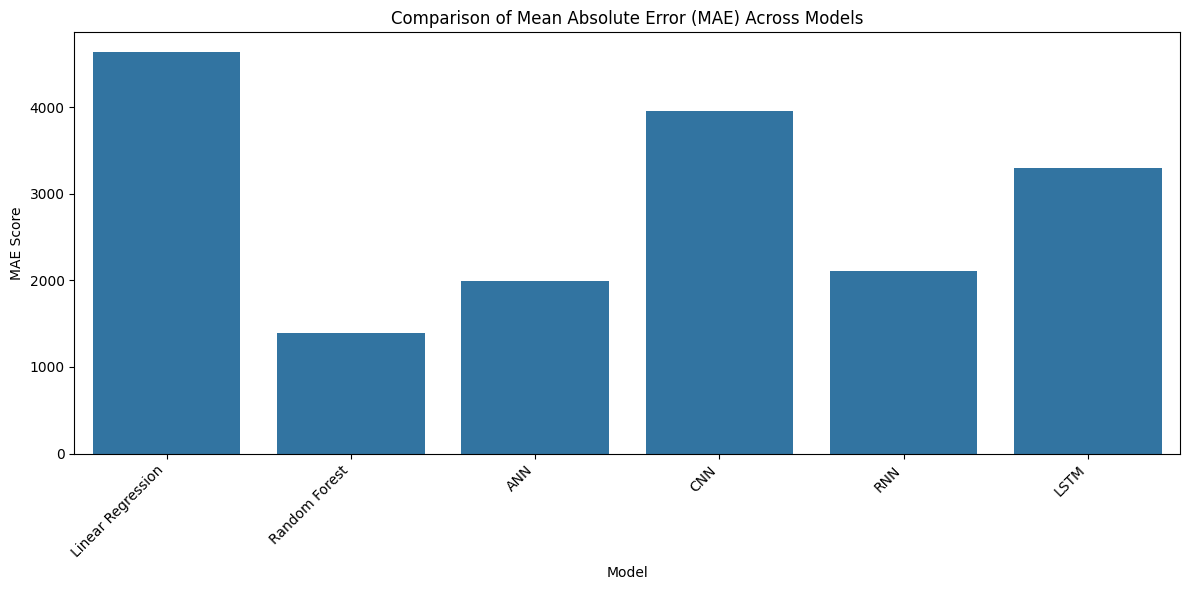

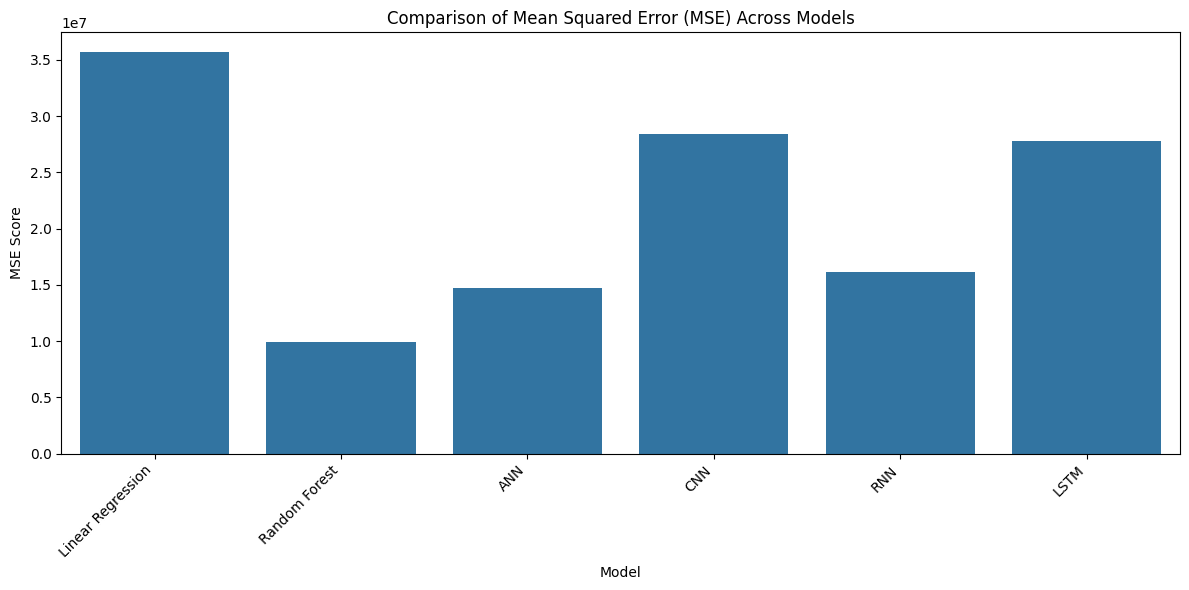

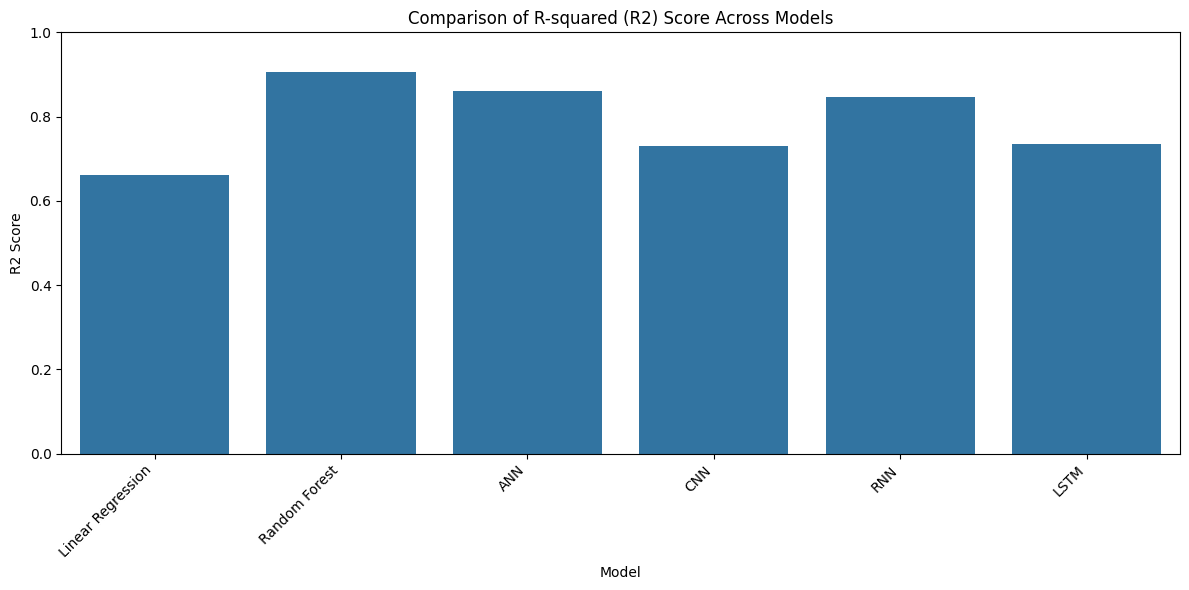

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the metrics in a dictionary for easy plotting
metrics = {
    'Model': ['Linear Regression', 'Random Forest', 'ANN', 'CNN', 'RNN', 'LSTM'],
    'MAE': [mae_linear, mae_random_forest, mae_ann, mae_cnn, mae_rnn, mae_lstm],
    'MSE': [mse_linear, mse_random_forest, mse_ann, mse_cnn, mse_rnn, mse_lstm],
    'R2': [r2_linear, r2_random_forest, r2_ann, r2_cnn, r2_rnn, r2_lstm]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame to long format for easier plotting with Seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Generate bar plot for MAE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', data=metrics_melted[metrics_melted['Metric'] == 'MAE'])
plt.title('Comparison of Mean Absolute Error (MAE) Across Models') # Add title
plt.xlabel('Model') # Add x-label
plt.ylabel('MAE Score') # Add y-label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()
# Comment: This bar plot compares the Mean Absolute Error (MAE) of the six trained models.
# Lower MAE indicates better performance. Random Forest appears to have the lowest MAE.
# Readability comments: The title clearly indicates the metric being compared. The rotated x-axis labels prevent overlap and make it easy to identify each model. The y-axis represents the MAE score, with lower bars indicating better performance.

# Generate bar plot for MSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', data=metrics_melted[metrics_melted['Metric'] == 'MSE'])
plt.title('Comparison of Mean Squared Error (MSE) Across Models') # Add title
plt.xlabel('Model') # Add x-label
plt.ylabel('MSE Score') # Add y-label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()
# Comment: This bar plot compares the Mean Squared Error (MSE) of the six trained models.
# Lower MSE indicates better performance. MSE penalizes larger errors more heavily.
# Random Forest shows the lowest MSE.
# Readability comments: The title clearly indicates the metric being compared. The rotated x-axis labels prevent overlap and make it easy to identify each model. The y-axis represents the MSE score, with lower bars indicating better performance.

# Generate bar plot for R2
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', data=metrics_melted[metrics_melted['Metric'] == 'R2'])
plt.title('Comparison of R-squared (R2) Score Across Models') # Add title
plt.xlabel('Model') # Add x-label
plt.ylabel('R2 Score') # Add y-label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.ylim(0, 1) # Set y-axis limit for R2 score between 0 and 1
plt.show()
# Comment: This bar plot compares the R-squared (R2) score of the six trained models.
# Higher R2 indicates better performance, representing the proportion of the variance in the dependent variable
# that is predictable from the independent variables. Random Forest has the highest R2 score.
# Readability comments: The title clearly indicates the metric being compared. The rotated x-axis labels prevent overlap and make it easy to identify each model. The y-axis represents the R2 score, with higher bars indicating better performance. The y-axis limit set from 0 to 1 is appropriate for R2 scores.


Scatter plots to visualize the predicted vs. actual values for each model on the test set, as requested. This will provide a visual representation of how well each model's predictions align with the true values.



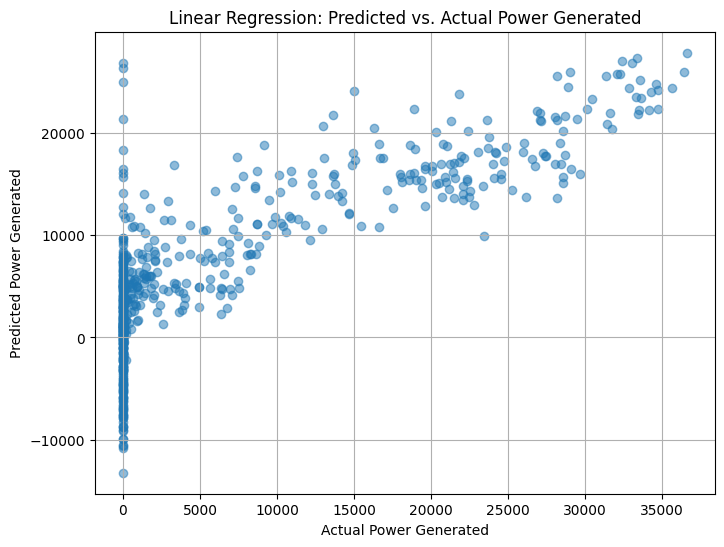

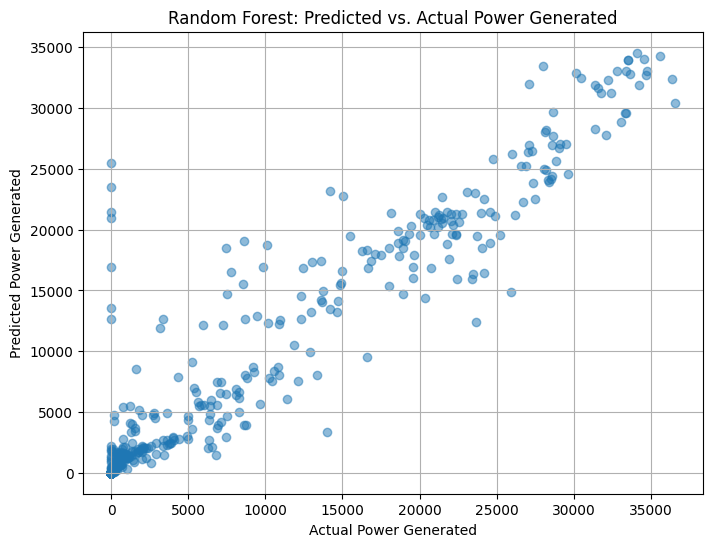

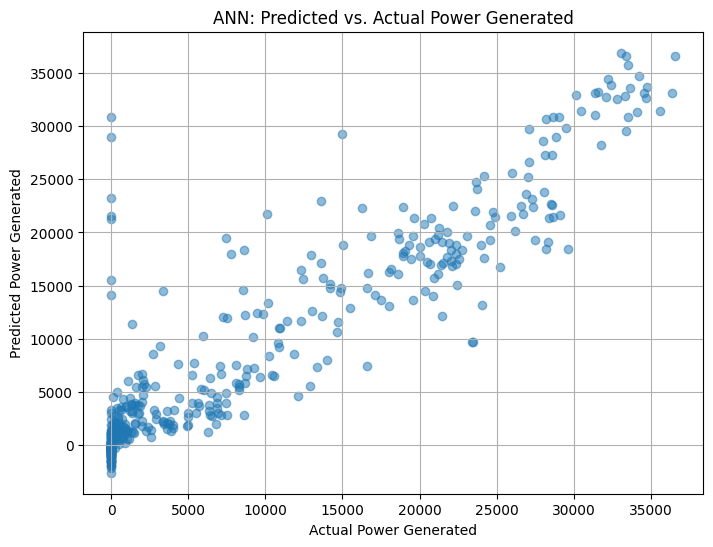

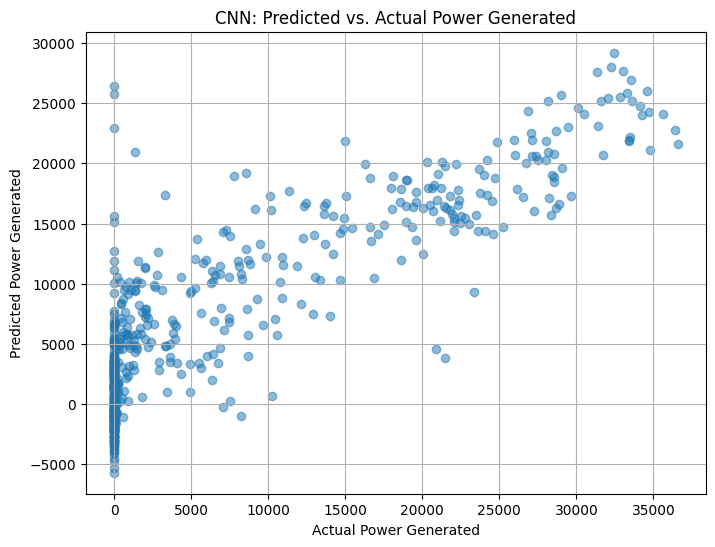

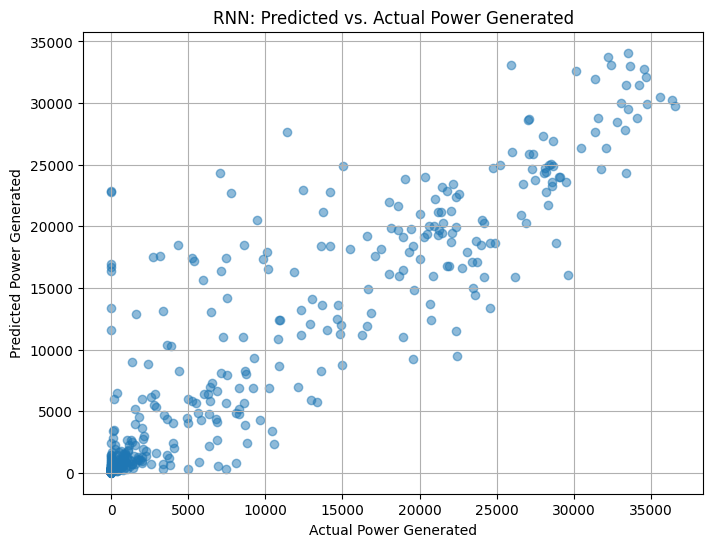

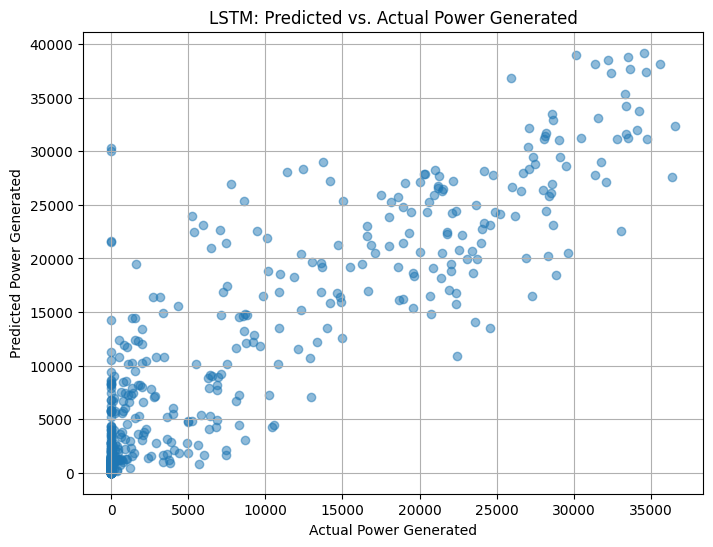

In [28]:
# Generate scatter plots of predicted vs. actual values for each model

# Linear Regression scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.title('Linear Regression: Predicted vs. Actual Power Generated') # Add title
plt.xlabel('Actual Power Generated') # Add x-label
plt.ylabel('Predicted Power Generated') # Add y-label
plt.grid(True) # Add grid
plt.show()
# Comment: This scatter plot shows the relationship between the actual and predicted power generated by the Linear Regression model.
# Points closer to the diagonal line indicate better predictions.
# Readability comments: The title clearly indicates what is being plotted. The axis labels are informative. The grid lines help in visually assessing how close the predicted values are to the actual values. The alpha setting makes overlapping points semi-transparent, giving an idea of the density of points.

# Random Forest Regressor scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_random_forest, alpha=0.5)
plt.title('Random Forest: Predicted vs. Actual Power Generated') # Add title
plt.xlabel('Actual Power Generated') # Add x-label
plt.ylabel('Predicted Power Generated') # Add y-label
plt.grid(True) # Add grid
plt.show()
# Comment: This scatter plot shows the relationship between the actual and predicted power generated by the Random Forest model.
# The points are more tightly clustered around the diagonal line compared to Linear Regression, indicating better performance.
# Readability comments: The title and axis labels are clear. The grid lines help in assessing the spread of predictions. The alpha setting helps visualize the density of points. The tighter clustering of points around the diagonal line visually confirms better performance.

# ANN scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.5)
plt.title('ANN: Predicted vs. Actual Power Generated') # Add title
plt.xlabel('Actual Power Generated') # Add x-label
plt.ylabel('Predicted Power Generated') # Add y-label
plt.grid(True) # Add grid
plt.show()
# Comment: This scatter plot shows the relationship between the actual and predicted power generated by the ANN model.
# The distribution of points suggests a reasonable fit, but with some dispersion.
# Readability comments: The title and axis labels are clear. The grid lines and alpha setting aid in readability and visualizing the spread of predictions.

# CNN scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cnn, alpha=0.5)
plt.title('CNN: Predicted vs. Actual Power Generated') # Add title
plt.xlabel('Actual Power Generated') # Add x-label
plt.ylabel('Predicted Power Generated') # Add y-label
plt.grid(True) # Add grid
plt.show()
# Comment: This scatter plot shows the relationship between the actual and predicted power generated by the CNN model.
# The spread of points indicates that the CNN model's predictions are less accurate compared to models like Random Forest or ANN.
# Readability comments: The title and axis labels are clear. The grid lines and alpha setting aid in readability and visualizing the spread of predictions. The wider spread of points compared to other models is visually apparent.

# RNN scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.5)
plt.title('RNN: Predicted vs. Actual Power Generated') # Add title
plt.xlabel('Actual Power Generated') # Add x-label
plt.ylabel('Predicted Power Generated') # Add y-label
plt.grid(True) # Add grid
plt.show()
# Comment: This scatter plot shows the relationship between the actual and predicted power generated by the RNN model.
# The predictions show a moderate correlation with actual values.
# Readability comments: The title and axis labels are clear. The grid lines and alpha setting aid in readability and visualizing the spread of predictions.

# LSTM scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.5)
plt.title('LSTM: Predicted vs. Actual Power Generated') # Add title
plt.xlabel('Actual Power Generated') # Add x-label
plt.ylabel('Predicted Power Generated') # Add y-label
plt.grid(True) # Add grid
plt.show()
# Comment: This scatter plot shows the relationship between the actual and predicted power generated by the LSTM model.
# Similar to CNN, the LSTM model's predictions appear less accurate than Random Forest or ANN based on the dispersion of points.
# Readability comments: The title and axis labels are clear. The grid lines and alpha setting aid in readability and visualizing the spread of predictions. The spread of points is visually comparable to the CNN model.

**Explanation of Scatter Plots (Predicted vs. Actual Power Generated):**

These scatter plots visualize the relationship between the actual power generated values (on the x-axis) and the power generated values predicted by each model (on the y-axis) on the test dataset.

*   **Linear Regression:** The scatter plot for Linear Regression shows a general upward trend, indicating that as actual power generated increases, the predicted power also tends to increase. However, the points are quite scattered around the ideal diagonal line (where predicted equals actual), suggesting that the model has a notable amount of error in its predictions. There is a particularly wide spread of predictions when the actual power generated is low.

*   **Random Forest:** The scatter plot for the Random Forest Regressor shows a much stronger clustering of points around the diagonal line compared to Linear Regression. This indicates that the Random Forest model's predictions are generally closer to the actual values, reflecting its better performance as seen in the evaluation metrics.

*   **ANN:** The scatter plot for the Artificial Neural Network (ANN) shows a reasonable alignment of predicted and actual values around the diagonal line. While not as tightly clustered as the Random Forest, it demonstrates a better fit than Linear Regression. There is still some dispersion, indicating prediction errors.

*   **CNN:** The scatter plot for the Convolutional Neural Network (CNN) shows a wider spread of points around the diagonal line compared to Random Forest and ANN. This visual representation supports the evaluation metrics that indicated lower performance for the CNN model on this dataset. The predictions are less consistently close to the actual values.

*   **RNN:** The scatter plot for the Recurrent Neural Network (RNN) shows a moderate correlation between the predicted and actual values. The points follow the general trend of the diagonal line, but there is a noticeable amount of scatter, suggesting that the RNN's predictions have a degree of error.

*   **LSTM:** The scatter plot for the Long Short-Term Memory (LSTM) network is visually similar to the CNN plot, showing a significant spread of points around the diagonal line. This indicates that the LSTM model, in this configuration, did not perform as well in predicting the power generated values compared to models like Random Forest or ANN.

## Summary:

### Data Analysis Key Findings

*   The dataset contains both numerical and a boolean ('Is Daylight') column.
*   Initial attempts to train and evaluate models faced issues with feature consistency and non-numerical data handling, specifically for neural networks.
*   After addressing these issues by ensuring all models were trained and evaluated on a consistent set of numerical features (including 'Is Daylight' converted to integer and scaled), the evaluation metrics were successfully calculated and visualized.
*   The Random Forest Regressor model consistently showed the best performance across all evaluation metrics: it had the lowest Mean Absolute Error (MAE), the lowest Mean Squared Error (MSE), and the highest R-squared (R2) score.
*   Scatter plots comparing predicted versus actual values visually supported the metric-based findings, showing the Random Forest Regressor predictions most closely aligned with the actual power generated values.

### Insights or Next Steps

*   The Random Forest Regressor is the recommended model for predicting power generation based on the current dataset and evaluation criteria.
*   Further investigation could involve hyperparameter tuning of the Random Forest Regressor and the potentially better performing neural network models (like ANN) to possibly improve their performance.
